* https://www.kaggle.com/loveall/clicks-conversion-tracking
* [Good notebook](https://www.kaggle.com/chrisbow/an-introduction-to-facebook-ad-analysis-using-r) -> work with client to ensure insights are relevant and actionable

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

## EDA
Lets first explore the dataset. Initial impression is it is very small

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
pd.__version__

'0.23.4'

In [3]:
ls

EDA.ipynb  KAG_conversion_data.csv  README.md


In [4]:
df = pd.read_csv('KAG_conversion_data.csv')

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
rows = df.shape[0]
rows

1143

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Gender

In [8]:
df['gender'].describe()

count     1143
unique       2
top          M
freq       592
Name: gender, dtype: object

In [9]:
pct_male = int(100*df['gender'][df['gender'] == 'M'].count()/df['gender'].count())
pct_male

51

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['gender'])

LabelEncoder()

In [11]:
le.classes_

array(['F', 'M'], dtype=object)

In [12]:
df['gender_encoded'] = le.transform(df['gender'])

In [13]:
df[['gender_encoded', 'gender']].iloc[74:80]

,gender_encoded,gender
74,1,M
75,1,M
76,1,M
77,0,F
78,0,F
79,0,F


Pretty evenly balanced male/female. Encode as 0,1 using https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

### Spend

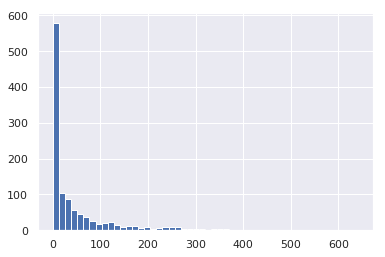

In [14]:
df['Spent'].hist(bins=50);

large number of zero spend. How about higher spends?

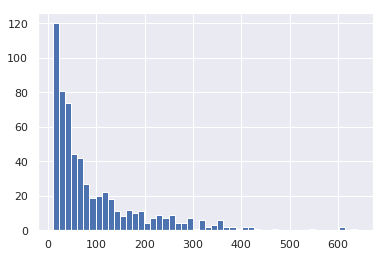

In [15]:
df['Spent'][df['Spent'] > 10].hist(bins=50);

### Unique ads
All adds have unique ad_id..

In [16]:
unique_ads = len(df['ad_id'].unique())
unique_ads

1143

## fb_campaign_id

In [17]:
unique_fb = len(df['fb_campaign_id'].unique())
unique_fb

691

Many campaigns, how many entries?

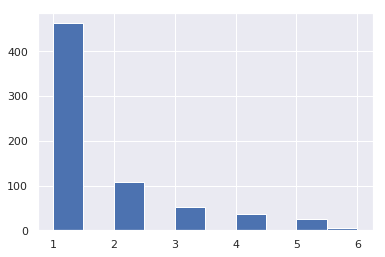

In [18]:
df.groupby('fb_campaign_id').count()['age'].hist();

Most campaigns have a single entry only

## xyzcampaignid
Company campaign id

In [19]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

OK so only 3 campaigns by company

In [20]:
df.groupby('xyz_campaign_id').count()['age']#.hist();

xyz_campaign_id
916      54
936     464
1178    625
Name: age, dtype: int64

Company total spend by campaign (put in its own dataframe for results)

In [21]:
df_xyz_campaign = df.groupby('xyz_campaign_id').sum()['Spent']
df_xyz_campaign = df_xyz_campaign.to_frame()
df_xyz_campaign

,Spent
xyz_campaign_id,
916,149.710001
936,2893.369999
1178,55662.149959


Get number of ads

In [22]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').count()['age'])

Mean Conversions by campaign

In [23]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').mean()['Total_Conversion'])

In [24]:
df_xyz_campaign = df_xyz_campaign.rename(columns={"Spent": "total_spend", "age": "number_of_ads", "Total_Conversion":"mean_conversion"})

In [25]:
df_xyz_campaign['spend_per_ad'] = df_xyz_campaign['total_spend']/df_xyz_campaign['number_of_ads']

In [26]:
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad
xyz_campaign_id,,,,
916,149.710001,54,1.074074,2.772407
936,2893.369999,464,1.157328,6.235711
1178,55662.149959,625,4.270400,89.059440


In [27]:
df_xyz_campaign['ROI'] = df_xyz_campaign['mean_conversion']/df_xyz_campaign['spend_per_ad']
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad,ROI
xyz_campaign_id,,,,,
916,149.710001,54,1.074074,2.772407,0.387416
936,2893.369999,464,1.157328,6.235711,0.185597
1178,55662.149959,625,4.270400,89.059440,0.047950


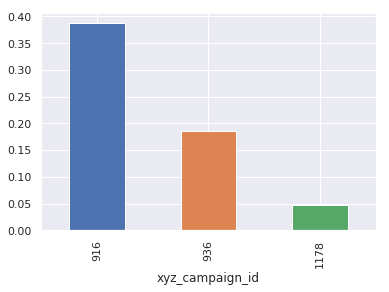

In [28]:
df_xyz_campaign['ROI'].plot.bar();

Campaign 916 was most successful from ROI but ran limited number of ads

## age

In [29]:
ages = df['age'].unique()
print(ages)

['30-34' '35-39' '40-44' '45-49']


In [30]:
df.groupby('age').count()['ad_id']

age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64

More under 40s than over. Replace ranges with mean age

In [31]:
df['age_mean'] = df['age'].replace(to_replace={'30-34': 32, '35-39':37, '40-44':42, '45-49':47})

In [32]:
# df[['age_mean', 'age']] correct

## Drop unencoded data
Now we have numeric data

In [33]:
df = df.drop(columns=['age', 'gender'])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_encoded,age_mean
0,708746,916,103916,15,7350,1,1.43,2,1,1,32
1,708749,916,103917,16,17861,2,1.82,2,0,1,32
2,708771,916,103920,20,693,0,0.00,1,0,1,32
3,708815,916,103928,28,4259,1,1.25,1,0,1,32
4,708818,916,103928,28,4133,1,1.29,1,1,1,32


## Visualise dataset
As per reference notebook we can vis the relationships in the data with a clustermap, but we must normalise the data first -> beware sensitivity to outliers
* https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [39]:
type(scaler.fit_transform(df)) ## the values are transformed but we do not get back a dataframe

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


numpy.ndarray

In [40]:
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


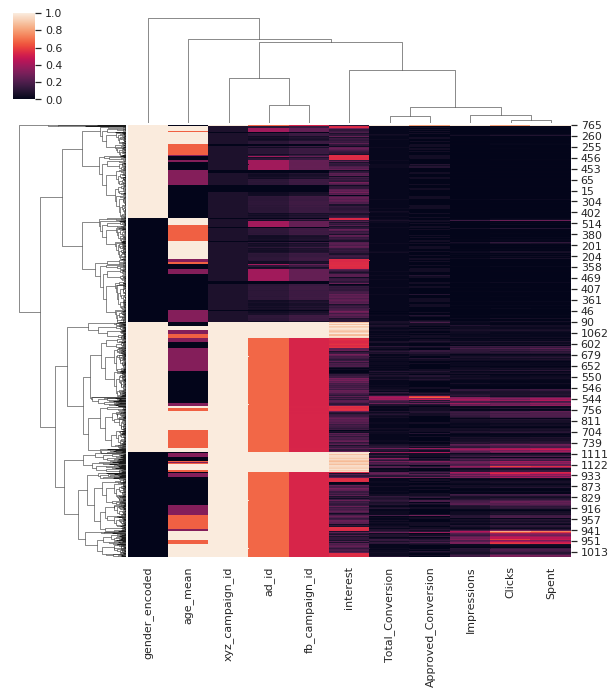

In [41]:
sns.clustermap(df_norm);

The clusters make sense - conversions are together, clicks and spent are together, ids are together

## Feature engineering
again copying our reference noteook

1) Click-through-rate (CTR). This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

2) Conversion Rate (CR). This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.

3) Cost Per Click (CPC). Self-explanatory this one: how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same.

4) Cost Per Conversion. Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.
